In [1]:
!pip install torchify

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4593646.95it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 132098.55it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1270772.60it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3076138.99it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
from torch.utils.data import DataLoader

In [5]:
train_dl=DataLoader(train_data,batch_size=128,shuffle=True)
test_dl=DataLoader(test_data,batch_size=128,shuffle=True)

In [6]:
from Torchify.VisionNet import ImageModel

In [7]:
import torch
from torch import nn,optim
import torch.nn.functional as F

In [9]:
class ConvolutionalNetwork(ImageModel):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(5*5*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X=X.view(-1,16*5*5)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)

        return F.log_softmax(X,dim=1)

In [10]:
lr=0.001
wd=1e-4
gc=0.1
epochs=5

In [11]:
model=ConvolutionalNetwork()

In [12]:
loss=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=lr,weight_decay=wd)
sched=optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,epochs=epochs,steps_per_epoch=len(train_dl))

In [13]:
model.compile(loss_fn=loss,
              optimizer=optimizer,
              scheduler=sched,
              grad_clip=gc)

In [14]:
import time
start=time.time()

history=model.fit(epochs=epochs,
                  train_loader=train_dl,
                  val_loader=test_dl)

print(f'Training time: {(time.time()-start)/60} minutes')

Training on cuda
Epoch [1], train_loss: 0.3623, train_acc: 0.8869, val_loss: 0.4321, val_acc: 0.9222
Epoch [2], train_loss: 0.5246, train_acc: 0.8824, val_loss: 0.3421, val_acc: 0.9206
Epoch [3], train_loss: 0.2956, train_acc: 0.9316, val_loss: 0.1658, val_acc: 0.9593
Epoch [4], train_loss: 0.1537, train_acc: 0.9610, val_loss: 0.0961, val_acc: 0.9736
Epoch [5], train_loss: 0.0790, train_acc: 0.9782, val_loss: 0.0736, val_acc: 0.9797
Training time: 0.7477821191151937 minutes


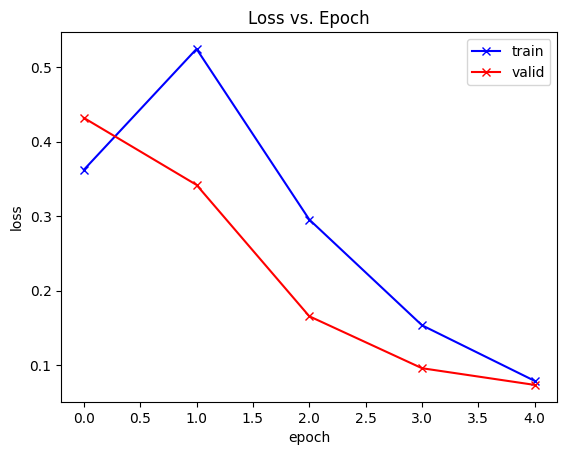

In [15]:
model.plot_losses()

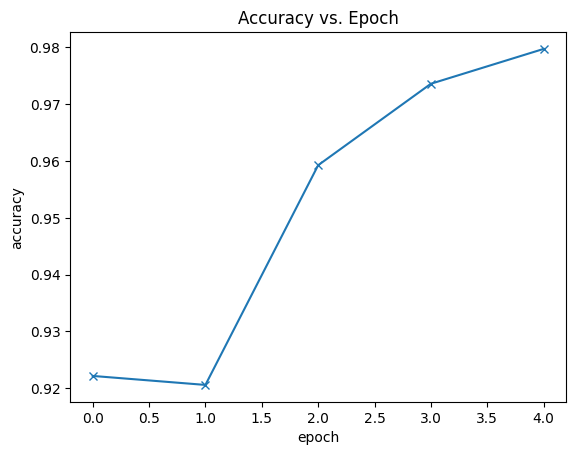

In [16]:
model.plot_accuracies()

In [17]:
model.metrics(test_data)

(0.9795, 0.9794026769270017, 0.9794545335903504)